<a href="https://colab.research.google.com/github/ReneMarkovic/Napredne_numericne_metode/blob/main/NNM_05_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redukcija dimenzije

V sodobni znanosti se vse pogosteje srečujemo z visoko-dimenzijskimi podatki, kjer ima vsak opazovani sistem več desetin, stotin ali celo tisočev spremenljivk. Takšni podatki se pojavljajo tako v eksperimentalni fiziki kot tudi v simulacijah kompleksnih sistemov, denimo pri sledenju stanj mnogodelčnih sistemov, pri analizi slik in spektralnih podatkov ali pri obdelavi rezultatov iz numeričnih modelov v astrofiziki, biofiziki in kvantni mehaniki. Čeprav so takšni podatki bogati z informacijami, jih je brez ustrezne metode zelo težko interpretirati, vizualizirati ali uporabiti za nadaljnje modeliranje. Tukaj nastopi koncept redukcije dimenzije.

`Redukcija dimenzije` je matematični in računski postopek, s katerim želimo predstaviti visoko-dimenzionalne podatke v prostoru z nižjo dimenzionalnostjo, običajno v dveh ali treh dimenzijah, pri čemer si prizadevamo `ohraniti čim več informacij o strukturi podatkov`. Glavna motivacija za uporabo takšnih metod je **razumevanje skritih vzorcev**, iskanje gručenja (angl. clustering), vizualizacija relacij med opazovanji ter odstranitev redundance in šuma. S tem podatke poenostavimo do te mere, da postanejo dostopni vizualnemu in konceptualnemu razumevanju, ne da bi pri tem izgubili njihovo fizikalno vsebino.

Za fizike je to še posebej pomembno, saj veliko eksperimentalnih sistemov generira ogromne količine podatkov, katerih zakonitosti niso očitne v originalni obliki. Redukcija dimenzije nam omogoča, da takšne zakonitosti odkrijemo – bodisi v obliki dominantnih mod gibanja, lastnih načinov vibracij, faznih prehodov ali korelacijskih struktur v statističnih sistemih. Poleg tega pa je redukcija dimenzije ključnega pomena tudi pri pripravi podatkov za strojno učenje, saj izboljša učinkovitost, preprečuje prenaučenje in omogoča jasnejšo interpretacijo modelov.

V okviru tega bomo spoznali dva temeljna pristopa k redukciji dimenzije: `glavno komponentno analizo (PCA)`, ki temelji na linearni transformaciji podatkov in iskanju smeri največje variance, ter metodo `t-SNE`, ki temelji na ohranjanju lokalnih struktur v podatkih in omogoča vizualizacijo kompleksnih nelinearnih relacij. Skozi konkretne primere bomo spoznali, kako lahko ti pristopi razkrijejo pomembne zakonitosti v podatkih, ki bi sicer ostale skrite, ter kako jih lahko uporabimo v raziskovalnem in aplikativnem kontekstu fizikalnih problemov.

# PCA

Pričujoča naloga nas bo vodila skozi osnovni koncept glavne komponentne analize (PCA) na umetno ustvarjenih podatkih. Ustvarili bomo dvodimenzionalni niz podatkov, ki so porazdeljeni okoli izhodišča (povprečna vrednost 0). Skupno bomo ustvarili 200 točk, ki bodo razporejene po elipsasti porazdelitvi, pri čemer bo glavna os elipse nagnjena glede na koordinatni sistem.

Za generacijo podatkov bomo uporabili večdimenzionalno normalno porazdelitev z določeno kovariančno matriko, ki vsebuje neničelne izven-diagonalne elemente. Ti elementi povzročijo, da spremenljivki
𝑥 in 𝑦 nista neodvisni, temveč korelirani – kar pomeni, da se njune vrednosti večinoma spreminjajo skupaj, in posledično porazdelitev ni poravnana s smerjo osi 𝑥 ali 𝑦, temveč je rotirana.

Cilj naloge je uporabiti PCA za identifikacijo glavne smeri razpršenosti v podatkih – to je tista smer, vzdolž katere točke najbolj "nihajo". PCA bo izračunal novo bazo (glavne komponente), v kateri je prva komponenta usmerjena v smeri največje variance v podatkih, druga komponenta pa je pravokotna na prvo. S tem bomo pokazali, da PCA samodejno zazna naravno geometrijo porazdelitve, ne glede na orientacijo v prostoru.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nastavimo generator zrnja za ponovljivost
np.random.seed(42)

n_samples = 200
mean = [0, 0]
cov = [[3, 2],[2, 2]]  # Kovariančna matrika z mešanimi komponentami
X = np.random.multivariate_normal(mean, cov, n_samples)

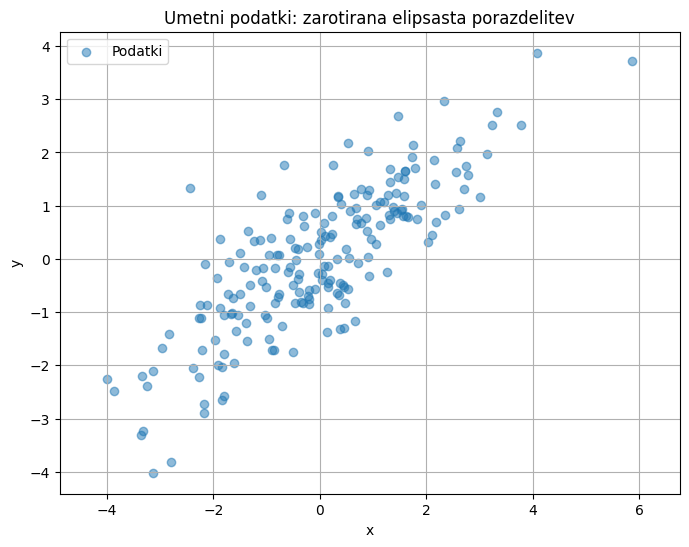

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Podatki')
plt.title("Umetni podatki: zarotirana elipsasta porazdelitev")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #Uporabimo PCA
X_pca = pca.fit_transform(X)
components = pca.components_         # Lastni vektorji
explained_var = pca.explained_variance_  # Lastne vrednosti (varianca)

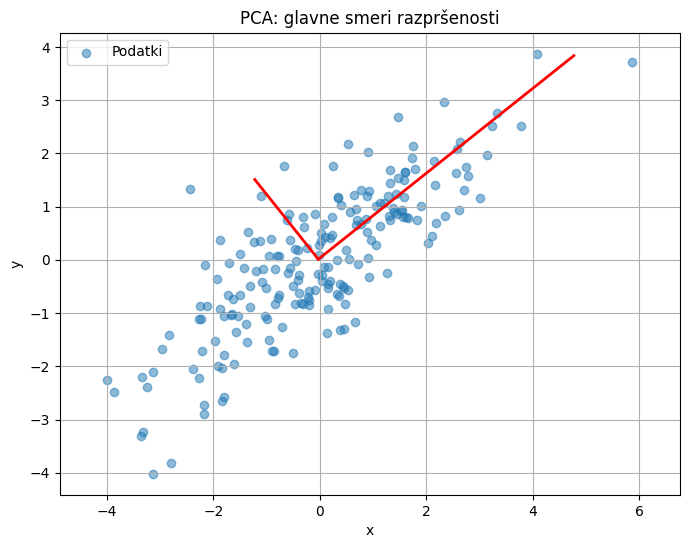

In [ ]:
# Korak 4: Vizualizacija komponent
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Podatki')

# Narisi glavni komponenti kot vektorja iz središča podatkov
origin = np.mean(X, axis=0)
for length, vector in zip(explained_var, components):
    v = vector * 3 * np.sqrt(length)  # raztegnemo za boljšo vidljivost
    plt.plot([origin[0], origin[0] + v[0]],
             [origin[1], origin[1] + v[1]],
             color='red', linewidth=2)

plt.title("PCA: glavne smeri razpršenosti")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## Vpliv spremenljivk

V PCA je vsaka glavna komponenta linearna kombinacija vhodnih spremenljivk:

$$
PC_1 = w_{1X} \cdot x + w_{1y} \cdot y
$$

$$
PC_2 = w_{2X} \cdot x + w_{2y} \cdot y
$$

Koeficienti $𝑤_{𝑖𝑗}$ so elementi lastnih vektorjev kovariančne matrike. Absolutne vrednosti teh koeficientov povedo, **koliko vsaka spremenljivka prispeva k posamezni komponenti**.

Če ima komponenta velike uteži za obe spremenljivki, pomeni, da "pokriva" skupno variabilnost obeh. Če ima komponenta utež skoraj samo za eno spremenljivko, pomeni, da jo ta komponenta dominantno opisuje.

Prispevki (uteži) posameznih komponent:
            x         y
PC1  0.782158  0.623080
PC2 -0.623080  0.782158


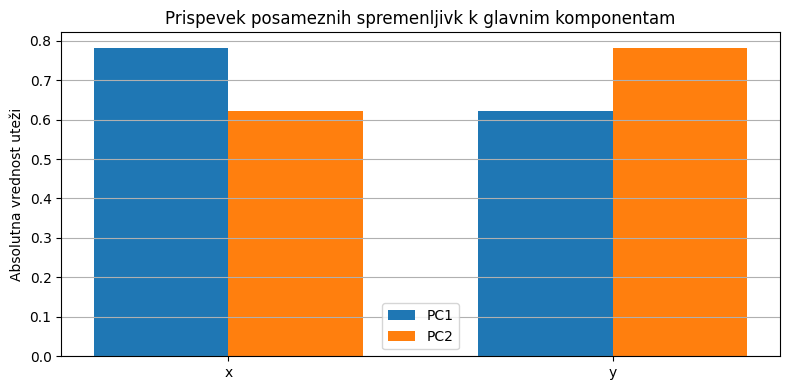

In [ ]:
import pandas as pd

feature_names = ['x', 'y']
component_df = pd.DataFrame(pca.components_, columns=feature_names,
                            index=[f'PC{i+1}' for i in range(len(components))])

print("Prispevki (uteži) posameznih komponent:")
print(component_df)

# Absolutne vrednosti za grafični prikaz
abs_components = np.abs(pca.components_)

# Grafično: prikaz "feature importance" kot stolpčni graf
plt.figure(figsize=(8, 4))
x = np.arange(len(feature_names))
bar_width = 0.35

plt.bar(x - bar_width/2, abs_components[0], bar_width, label='PC1')
plt.bar(x + bar_width/2, abs_components[1], bar_width, label='PC2')

plt.xticks(x, feature_names)
plt.ylabel("Absolutna vrednost uteži")
plt.title("Prispevek posameznih spremenljivk k glavnim komponentam")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Interpretacija

vsaka vrstica predstavlja en lastni vektor, torej:

$$
PC1 = 0.782⋅x+0.623⋅y
$$
$$
PC2=-0.623⋅x+0.782⋅y
$$

Prva komponenta (PC1) ima pozitivne uteži za obe spremenljivki (x in y). To pomeni, da obe spremenljivki skupaj prispevata v isto smer – če raste 𝑥, običajno raste tudi y.

PC1 gleda v smer diagonale med 𝑥 in 𝑦 (zarotirano os elipse razpršenosti). Skoraj 78 % prispevka pride iz x, 62 % iz y – torej nekoliko bolj v "x + y" smeri.

Druga komponenta (PC2) ima nasprotna predznaka za x in y (-x+y). To pomeni, da PC2 gleda v smer razlike med y in x – to je pravokotna smer na prvo komponento.

PCA točno to zahteva (komponente morajo biti medsebojno ortogonalne).

Rotacija osnega sistema:

Novi koordinatni sistem (PC1, PC2) je enaka osnova kot os elipse, ki opiše razpršenost podatkov.

PCA je "odkril" naravno orientacijo podatkov in poravnal prvo komponento z glavno osjo raztrosa (večja varianca), drugo pa pravokotno nanjo.

## Realni primer

#### Pridobimo podatke

In [ ]:
import pandas as pd

leto = 2015
www = f"https://raw.githubusercontent.com/ReneMarkovic/Napredne_numericne_metode/refs/heads/main/05_Redukcija_Dimenzije/{leto}.csv"
df = pd.read_csv(www)
display(df.head())

for i,c in enumerate(df.columns):
    print(i,c)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


0 Country
1 Region
2 Happiness Rank
3 Happiness Score
4 Standard Error
5 Economy (GDP per Capita)
6 Family
7 Health (Life Expectancy)
8 Freedom
9 Trust (Government Corruption)
10 Generosity
11 Dystopia Residual


#### Počistimo podatke

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

print(df.columns.to_list()) # Prikažemo imena vseh stolpcev in indekse, da preverimo, kateri so ustrezni

country_label = df.columns[0]
region_label = df.columns[1]

selected_columns = df.columns[[3, 5, 6, 7, 8, 9, 10]]  #Izberemo stolpce

happiness_new = df[selected_columns] # Ustvarimo novi DataFrame s temi stolpci

print(happiness_new.isnull().sum()) # Število manjkajočih vrednosti po stolpcih
print(happiness_new[happiness_new.isnull().any(axis=1)]) # Kombinacije manjkajočih podatkov

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64
Empty DataFrame
Columns: [Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []


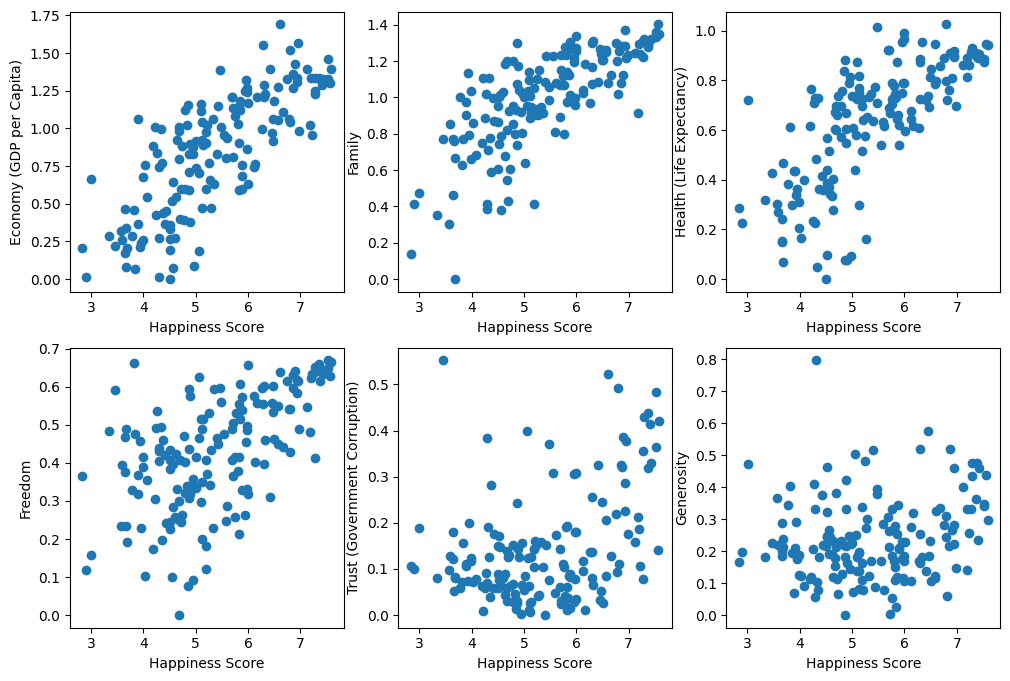

In [ ]:
plt.figure(figsize=(12,8))
for i,var in enumerate(["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom", "Trust (Government Corruption)", "Generosity"]):
  plt.subplot(2,3,i+1)
  plt.scatter(df["Happiness Score"], df[var])
  plt.xlabel("Happiness Score")
  plt.ylabel(var)
plt.show()

#### Kako so podatki med seboj povezani (korelacija)

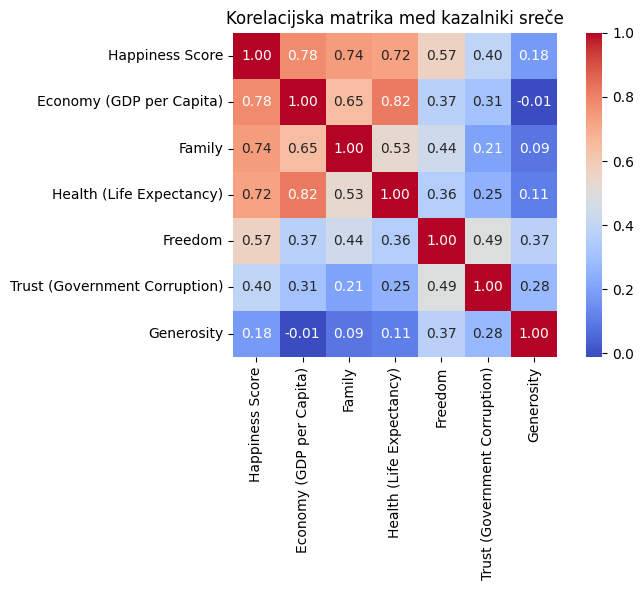

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korak 1: Korelacijska matrika
M = happiness_new.corr()

# Korak 2: Vizualizacija s Seaborn toplotno karto
plt.figure(figsize=(8, 6))
sns.heatmap(M, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Korelacijska matrika med kazalniki sreče")
plt.tight_layout()
plt.show()

#### Izvedemo PCA

In [ ]:
from sklearn.decomposition import PCA

# Uporabimo numerične stolpce
happiness_numeric = happiness_new.select_dtypes(include=[np.number])

# Standardiziramo podatke
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(happiness_numeric)

# PCA analiza (največ komponent = število stolpcev)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#### Preverimo razlagalno moč posameznih spremenljivk

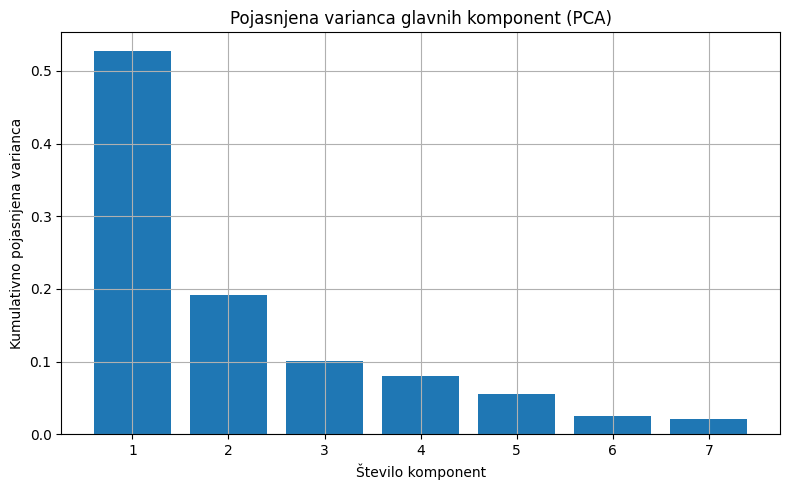

In [ ]:
explained_variance = pca.explained_variance_ratio_ # Pojasnjena varianca po komponentah

plt.figure(figsize=(8, 5))
# Assuming you want to plot the explained variance ratios as bar heights:
x = [i+1 for i in range(len(explained_variance))]
plt.bar(x, explained_variance)
plt.xlabel("Število komponent")
plt.ylabel("Kumulativno pojasnjena varianca")
plt.title("Pojasnjena varianca glavnih komponent (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Koordinate opazovanj (projekcija držav na komponente)
coords_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])

# Prispevki spremenljivk (loadingi)
loadings = pd.DataFrame(pca.components_.T,
                        index=happiness_numeric.columns,
                        columns=[f'PC{i+1}' for i in range(len(happiness_numeric.columns))])

print("Prispevek spremenljivk (loadingi):")
print(loadings[['PC1', 'PC2']])

Prispevek spremenljivk (loadingi):
                                    PC1       PC2
Happiness Score                0.481803 -0.085148
Economy (GDP per Capita)       0.447042 -0.308751
Family                         0.408155 -0.186430
Health (Life Expectancy)       0.425004 -0.245330
Freedom                        0.356895  0.404808
Trust (Government Corruption)  0.272391  0.454400
Generosity                     0.138673  0.657366


#### Prikaz preslikave spremenljivk v reduciran prostor

In [ ]:
# Pridobimo loadinge (prispevke spremenljivk k komponentam)
loadings = pd.DataFrame(pca.components_.T,
                        index=happiness_numeric.columns,
                        columns=[f'PC{i+1}' for i in range(len(happiness_numeric.columns))])

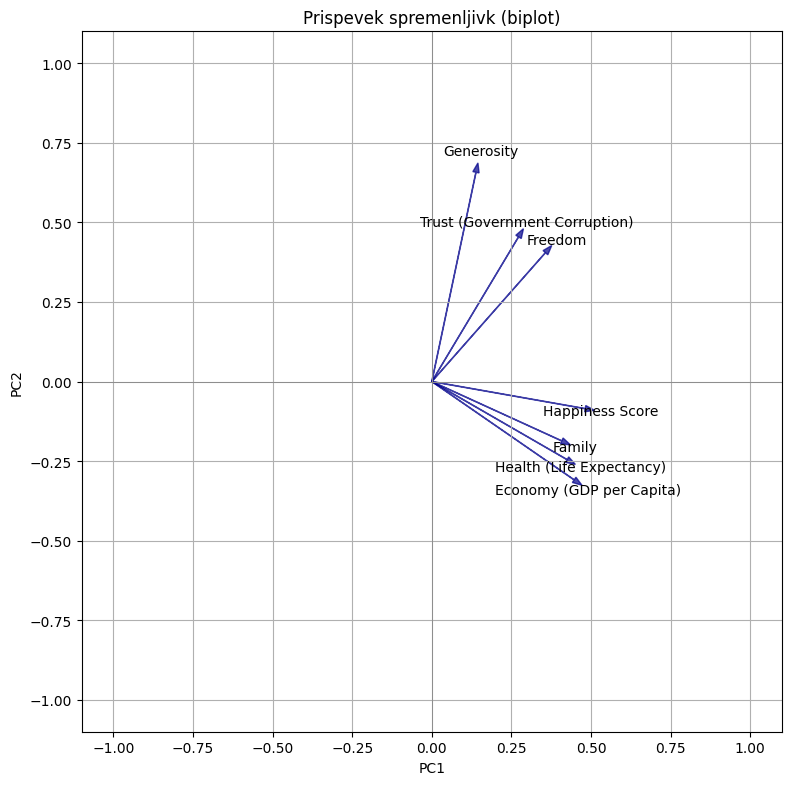

In [ ]:
plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

for var in loadings.index:
    x = loadings.loc[var, 'PC1']
    y = loadings.loc[var, 'PC2']
    plt.arrow(0, 0, x, y, color='darkblue', alpha=0.7, head_width=0.02)
    plt.text(x * 1.1, y * 1.1, var, color='black', ha='center', va='center')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Prispevek spremenljivk (biplot)")
plt.grid(True)
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

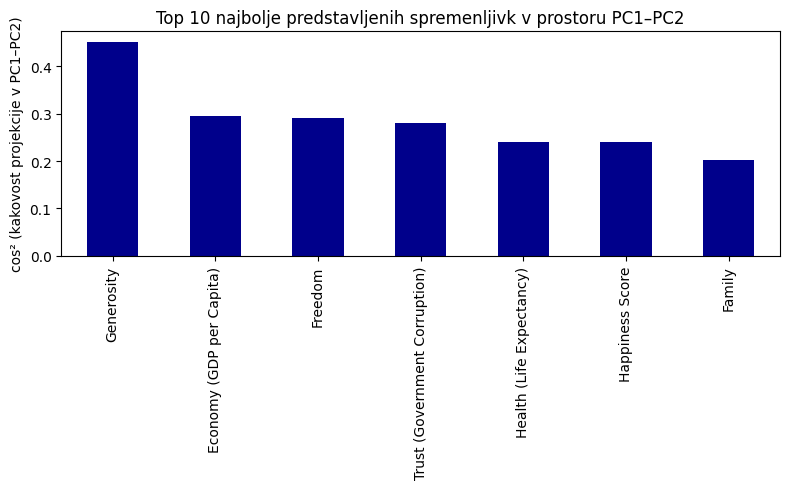

In [ ]:
# Izračun cos² vrednosti za vsako spremenljivko
# cos² = kvadrat projekcije na ravnino / kvadrat dolžine vektorja
loadings_pc1 = loadings['PC1']
loadings_pc2 = loadings['PC2']
cos2 = loadings_pc1**2 + loadings_pc2**2

# Razvrstimo od največjega
cos2_sorted = cos2.sort_values(ascending=False)

# Prikaz top 10
top_cos2 = cos2_sorted.head(10)

# Stolpčni graf
plt.figure(figsize=(8, 5))
top_cos2.plot(kind='bar', color='darkblue')
plt.ylabel('cos² (kakovost projekcije v PC1–PC2)')
plt.title('Top 10 najbolje predstavljenih spremenljivk v prostoru PC1–PC2')
plt.tight_layout()
plt.show()

#### Vizualizacija vseh podatkov

In [ ]:
# Izračun prispevkov za vsako komponento (v %)
contrib = pd.DataFrame()

for i in range(pca.components_.shape[0]):
    comp = pca.components_[:, i]  # komponenta i
    squared_loadings = comp ** 2
    contrib_pc = 100 * squared_loadings / np.sum(squared_loadings)
    contrib[f'PC{i+1}'] = contrib_pc

contrib.index = happiness_numeric.columns
print("Prispevek spremenljivk k prvi komponenti (PC1):")
print(contrib['PC1'].sort_values(ascending=False))

print("\nPrispevek spremenljivk k drugi komponenti (PC2):")
print(contrib['PC2'].sort_values(ascending=False))

Prispevek spremenljivk k prvi komponenti (PC1):
Trust (Government Corruption)    70.947827
Happiness Score                  23.213445
Generosity                        3.712728
Economy (GDP per Capita)          0.725026
Health (Life Expectancy)          0.670033
Freedom                           0.480438
Family                            0.250502
Name: PC1, dtype: float64

Prispevek spremenljivk k drugi komponenti (PC2):
Generosity                       62.656430
Happiness Score                  19.984635
Economy (GDP per Capita)          9.532698
Health (Life Expectancy)          6.864888
Trust (Government Corruption)     0.560542
Family                            0.338186
Freedom                           0.062622
Name: PC2, dtype: float64


<ipython-input-133-ab3446f2793a>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(region_names))


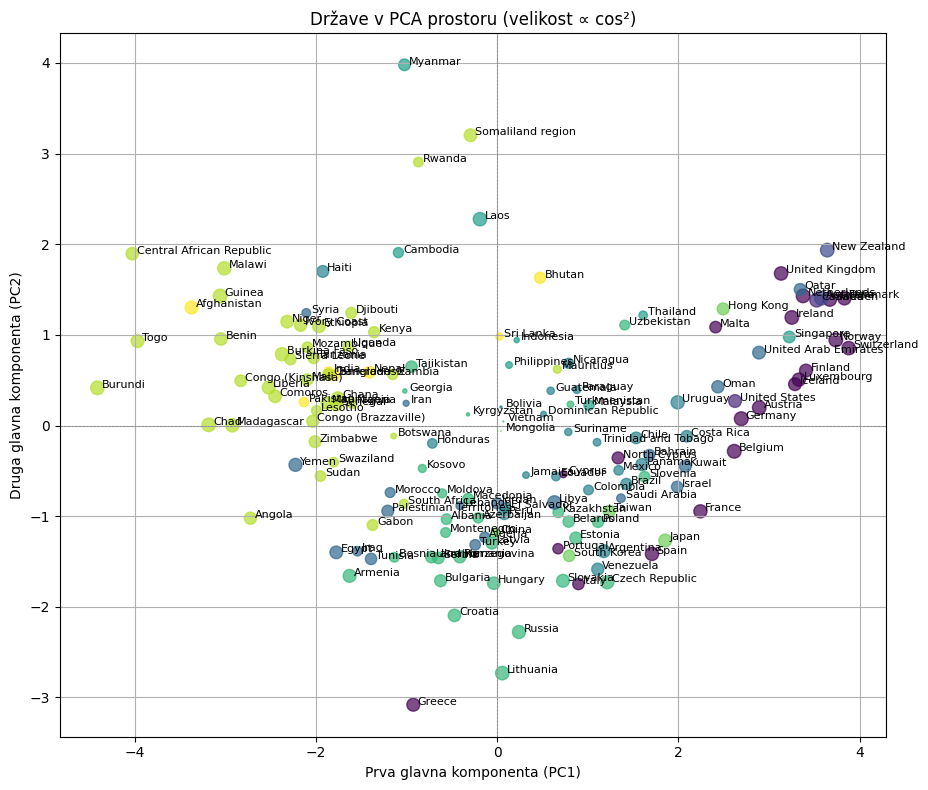

In [ ]:
from matplotlib import cm
from matplotlib.colors import Normalize

# Koordinate opazovanj v PCA prostoru (npr. države)
coords = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
coords.index = happiness_new.index  # ohranimo ustrezne indekse

# cos²: kvadrat projekcije vsake točke na PC1–PC2
cos2_ind = (coords**2).sum(axis=1)
total_dist2 = (X_scaled**2).sum(axis=1)  # vsota kvadratov originalnih standardiziranih komponent

cos2_ind_total = cos2_ind / total_dist2  # kakovost reprezentacije v 2D

# Dodamo v DataFrame
coords['cos2'] = cos2_ind_total
plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Velikost točke = cos2 (normalizirano za vidnost)
sizes = 100 * coords['cos2']  # prilagodi po potrebi

coords['region'] = df.loc[coords.index, 'Region']
region_names = coords['region'].unique()
region_dict = {name: i for i, name in enumerate(region_names)}
region_ids = coords['region'].map(region_dict)
cmap = cm.get_cmap('viridis', len(region_names))
norm = Normalize(vmin=0, vmax=len(region_names)-1)


# Označi države (če imaš stolpec z imeni)
if 'Country' in df.columns:
    labels = df.loc[coords.index, 'Country']
else:
    labels = coords.index.astype(str)

# Nariši točke in oznake

scatter = plt.scatter(coords['PC1'], coords['PC2'],
                      c=region_ids, cmap=cmap, norm=norm,
                      s=sizes, alpha=0.7)

for i, txt in enumerate(labels):
    plt.text(coords['PC1'][i] + 0.05, coords['PC2'][i], txt, fontsize=8)

plt.xlabel("Prva glavna komponenta (PC1)")
plt.ylabel("Druga glavna komponenta (PC2)")
plt.title("Države v PCA prostoru (velikost ∝ cos²)")
plt.grid(True)
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

In [ ]:
#Show only top 20 countries
coords_df = coords.sort_values(by='cos2', ascending=False)
top_countries = coords_df.head(20)
top_countries["Country"] = df.loc[top_countries.index, "Country"]
print(top_countries)

          PC1       PC2      cos2                           region  \
9    3.577531  1.405536  0.987138        Australia and New Zealand   
25   2.693285  0.074972  0.986368                   Western Europe   
149 -3.056026  1.429022  0.978066               Sub-Saharan Africa   
18   2.616009 -0.284471  0.975462                   Western Europe   
4    3.525433  1.383170  0.973817                    North America   
3    3.736513  0.944023  0.973184                   Western Europe   
8    3.642192  1.935137  0.957286        Australia and New Zealand   
6    3.375228  1.430147  0.956078                   Western Europe   
17   3.251335  1.192319  0.953799                   Western Europe   
12   2.891749  0.196489  0.953344                   Western Europe   
156 -4.411200  0.415723  0.950200               Sub-Saharan Africa   
148 -3.182386  0.006914  0.941952               Sub-Saharan Africa   
55   0.056903 -2.732195  0.941578       Central and Eastern Europe   
62   0.632168 -0.849

<ipython-input-134-8df275517e95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries["Country"] = df.loc[top_countries.index, "Country"]
